In [1]:
import os
import json 
import argparse
import numpy as np
import math
import pickle
import datetime
import time
import logging
import itertools

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

You can specify an URL to an image:

In [11]:
url = 'https://cdn.topofart.com/images/artists/John_Singer_Sargent/paintings/sargent029.jpg'
import urllib.request
urllib.request.urlretrieve(url, "input_img.jpg")
imgpath = os.path.abspath("input_img.jpg")

Or specify an image from the styletransfer art dataset:

In [2]:
imgpath = '/home/althausc/nfs/data/coco_17_medium/val2017_styletransfer/000000000785_050351.jpg'

Show the loaded image:

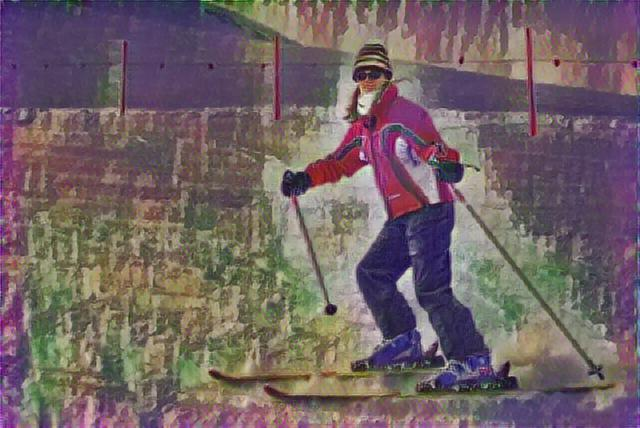

In [3]:
from IPython.display import Image, display
display(Image(filename=imgpath))

Infer the scene graph from the image & Visualize the result:

/home/althausc/nfs/data/coco_17_medium/val2017_styletransfer/000000000785_050351.jpg
SCENE GRAPH PREDICTION ...
SCENE GRAPH PREDICTION DONE.

VISUALIZE SCENEGRAPH ...
VISUALIZE SCENEGRAPH DONE.
/home/althausc/master_thesis_impl/Scene-Graph-Benchmark.pytorch/out/visualize/09-23_15-12-35/1000000000785_050351_scenegraph.jpg


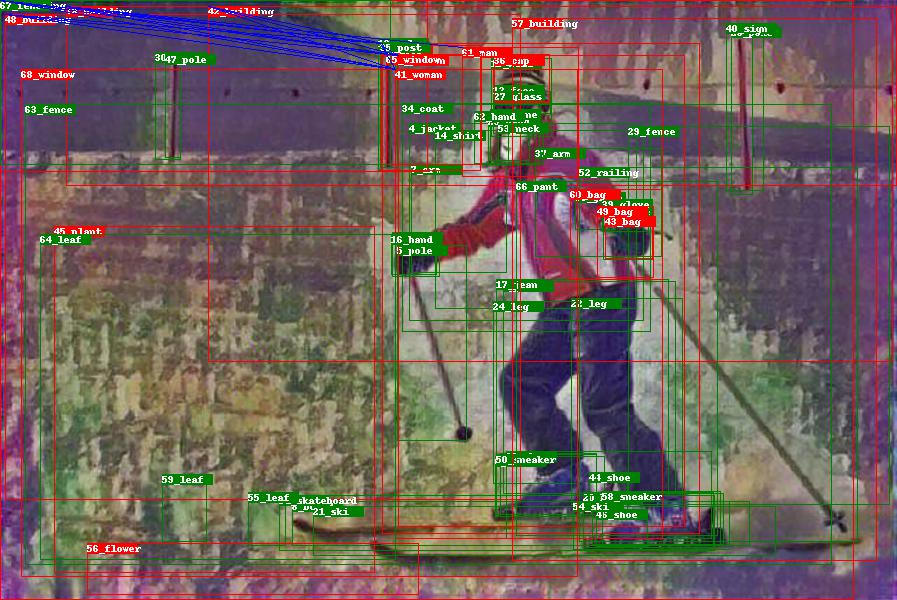

Box labels: 
0_hat; 0.7895205616950989
1_man; 0.69559645652771
9_person; 0.23106525838375092
18_building; 0.08936524391174316
25_building; 0.0691746324300766
28_building; 0.05567799136042595
31_door; 0.04694662615656853
36_cap; 0.03705573081970215
41_woman; 0.027913622558116913
42_building; 0.02780897542834282
43_bag; 0.027285117655992508
45_plant; 0.026663677766919136
48_building; 0.022083207964897156
49_bag; 0.017988264560699463
56_flower; 0.012475201860070229
57_building; 0.012456090189516544
60_bag; 0.011229046620428562
61_man; 0.00973171554505825
65_window; 0.007969439961016178
68_window; 0.006483897101134062
Rel labels: 
18_building => behind => 1_man; 0.958246111869812	0
42_building => behind => 1_man; 0.9498453736305237	1
18_building => behind => 41_woman; 0.9460359811782837	2
18_building => behind => 9_person; 0.9432324171066284	3
42_building => behind => 41_woman; 0.9420567154884338	4
42_building => behind => 9_person; 0.935295045375824	6
28_building => behind => 1_man; 0.932

In [4]:
from predict_search_modules import predict_scenegraph, visualize_scenegraph

annpath = predict_scenegraph(imgpath)

filterlabels = True #False
imgpath, anns = visualize_scenegraph(annpath, filterlabels)
print(imgpath)
display(Image(filename=imgpath))

with open(anns, 'r') as f:
    print(f.read())


Filter out best predictions & Transform into Graph2Vec input format:

In [5]:
from predict_search_modules import transform_into_g2vformat

graphfile = transform_into_g2vformat(annpath)

TRANSFORM PREDICTIONS INTO GRAPH2VEC FORMAT ...
TRANSFORM PREDICTIONS INTO GRAPH2VEC FORMAT DONE.


Search best matching image (respectively graph) from previous trained model:

In [6]:
from predict_search_modules import search_topk
k = 10
filetopk = search_topk(graphfile, k)

GRAPH2VEC PREDICTION & RETRIEVAL ...
GRAPH2VEC PREDICTION & RETRIEVAL DONE.
Results:  [['g_/home/althausc/nfs/data/styleimgs_test/styles/62187.jpg', 0.12606334686279297], ['g_/home/althausc/nfs/data/styleimgs_test/styles/75379.jpg', 0.05774582549929619], ['g_/home/althausc/nfs/data/styleimgs_test/styles/92741.jpg', 0.02812008000910282]]


Show images in ranking:

Reading from file:  /home/althausc/master_thesis_impl/retrieval/out/scenegraphs/09/23_15-12-49/topkresults.json
['g_/home/althausc/nfs/data/styleimgs_test/styles/62187.jpg', 0.12606334686279297]
['g_/home/althausc/nfs/data/styleimgs_test/styles/75379.jpg', 0.05774582549929619]
['g_/home/althausc/nfs/data/styleimgs_test/styles/92741.jpg', 0.02812008000910282]
['Query Image', 0.12606334686279297, 0.05774582549929619, 0.02812008000910282]



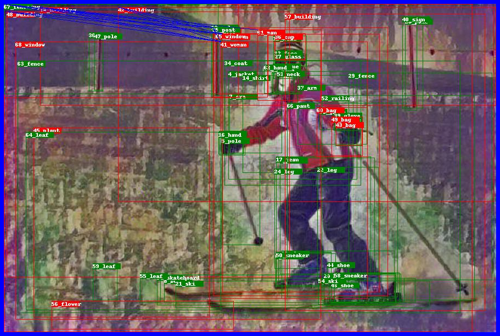
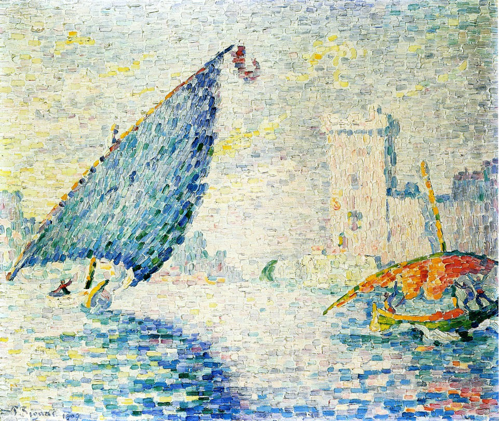
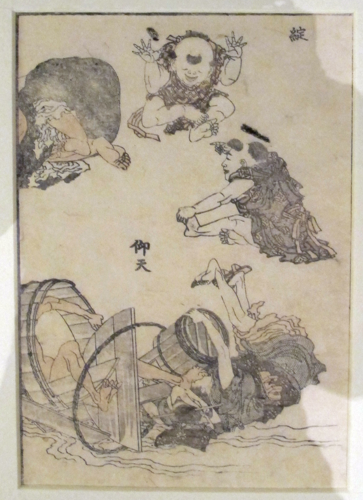
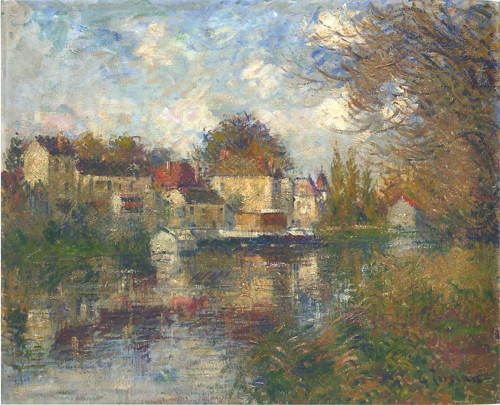

In [7]:
import ipyplot
from predict_search_modules import getImgs, treshIndex, drawborder

imgs, scores = getImgs(filetopk)
queryim = drawborder(imgpath)
imgs.insert(0,queryim)

tresh = 0.01
k = treshIndex(tresh, filetopk) + 1

ipyplot.plot_images(imgs[:k], labels=None, scores=scores[:k], max_images=30, img_width=250)

In [8]:
%load_ext autoreload
%autoreload 2